## อ่านข้อมูล

In [4]:
import pandas as pd

df = pd.read_excel("01082024_31082024.xlsx")
df

,ระดับน้ำรายชั่วโมง: G.2A บ้านกกโถ้ง,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,แม่น้ำ: น้ำแม่กก ต.รอบเวียง อ.เมือง จ.เชียงราย,NaN,NaN,NaN
1,ตั้งแต่ วันที่ 1 สิงหาคม 2024 ถึง 31 สิงหาคม 2024,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,วันที่,เวลา,ระดับน้ำ 4.00 (ม.),ปริมาณน้ำ 596.00 (ลบ.ม/วิ)
4,1 สิงหาคม 2024,06.00 น.,2.13,*
...,...,...,...,...
94,30 สิงหาคม 2024,12.00 น.,3.60,515.50
95,30 สิงหาคม 2024,18.00 น.,3.50,481.00
96,31 สิงหาคม 2024,06.00 น.,3.25,400.75
97,31 สิงหาคม 2024,12.00 น.,3.26,403.80


In [5]:
import pandas as pd

# โหลดไฟล์ Excel
file_path = "01082024_31082024.xlsx"  # เปลี่ยนเป็น path ไฟล์ของคุณ
df = pd.read_excel(file_path, sheet_name=0)

# ข้ามบรรทัดบนสุด (ข้อความทั่วไป) และเริ่มที่แถวที่ 5 เป็นต้นไป
df = df.iloc[4:].copy()
df.columns = ['date_str', 'time_str', 'Water_Level', 'Water quantity']
df

,date_str,time_str,Water_Level,Water quantity
4,1 สิงหาคม 2024,06.00 น.,2.13,*
5,1 สิงหาคม 2024,12.00 น.,2.50,*
6,1 สิงหาคม 2024,18.00 น.,2.60,*
7,2 สิงหาคม 2024,06.00 น.,2.90,*
8,2 สิงหาคม 2024,12.00 น.,3.05,*
...,...,...,...,...
94,30 สิงหาคม 2024,12.00 น.,3.60,515.50
95,30 สิงหาคม 2024,18.00 น.,3.50,481.00
96,31 สิงหาคม 2024,06.00 น.,3.25,400.75
97,31 สิงหาคม 2024,12.00 น.,3.26,403.80


In [6]:
df['Water_Level'] = df['Water_Level'].replace('*', 0).astype(float)
df['Water quantity'] = df['Water quantity'].replace('*', 0).astype(float)
df

,date_str,time_str,Water_Level,Water quantity
4,1 สิงหาคม 2024,06.00 น.,2.13,0.00
5,1 สิงหาคม 2024,12.00 น.,2.50,0.00
6,1 สิงหาคม 2024,18.00 น.,2.60,0.00
7,2 สิงหาคม 2024,06.00 น.,2.90,0.00
8,2 สิงหาคม 2024,12.00 น.,3.05,0.00
...,...,...,...,...
94,30 สิงหาคม 2024,12.00 น.,3.60,515.50
95,30 สิงหาคม 2024,18.00 น.,3.50,481.00
96,31 สิงหาคม 2024,06.00 น.,3.25,400.75
97,31 สิงหาคม 2024,12.00 น.,3.26,403.80


In [7]:
# แมพชื่อเดือนภาษาไทยเป็นตัวเลข
thai_months = {
    'มกราคม': '01', 'กุมภาพันธ์': '02', 'มีนาคม': '03', 'เมษายน': '04',
    'พฤษภาคม': '05', 'มิถุนายน': '06', 'กรกฎาคม': '07', 'สิงหาคม': '08',
    'กันยายน': '09', 'ตุลาคม': '10', 'พฤศจิกายน': '11', 'ธันวาคม': '12'
}

# ฟังก์ชันแปลงวัน+เวลาเป็นรูปแบบที่ต้องการ
def convert_thai_date(row):
    try:
        day, month_th, year = row['date_str'].split()
        month = thai_months.get(month_th, '01')
        time = row['time_str'].replace(" น.", "").replace(":", ".")
        return f"{int(day):02d}/{month}/{year}/{time}"
    except:
        return None

# สร้างคอลัมน์ใหม่
df['date'] = df.apply(convert_thai_date, axis=1)

# ลบคอลัมน์ date_str และ time_str ทิ้ง
df.drop(columns=['date_str', 'time_str'], inplace=True)
df

,Water_Level,Water quantity,date
4,2.13,0.00,01/08/2024/06.00
5,2.50,0.00,01/08/2024/12.00
6,2.60,0.00,01/08/2024/18.00
7,2.90,0.00,02/08/2024/06.00
8,3.05,0.00,02/08/2024/12.00
...,...,...,...
94,3.60,515.50,30/08/2024/12.00
95,3.50,481.00,30/08/2024/18.00
96,3.25,400.75,31/08/2024/06.00
97,3.26,403.80,31/08/2024/12.00


In [8]:
data = df[['date', 'Water_Level', 'Water quantity']].dropna()
data

,date,Water_Level,Water quantity
4,01/08/2024/06.00,2.13,0.00
5,01/08/2024/12.00,2.50,0.00
6,01/08/2024/18.00,2.60,0.00
7,02/08/2024/06.00,2.90,0.00
8,02/08/2024/12.00,3.05,0.00
...,...,...,...
94,30/08/2024/12.00,3.60,515.50
95,30/08/2024/18.00,3.50,481.00
96,31/08/2024/06.00,3.25,400.75
97,31/08/2024/12.00,3.26,403.80


## Plot graph look for Relationships

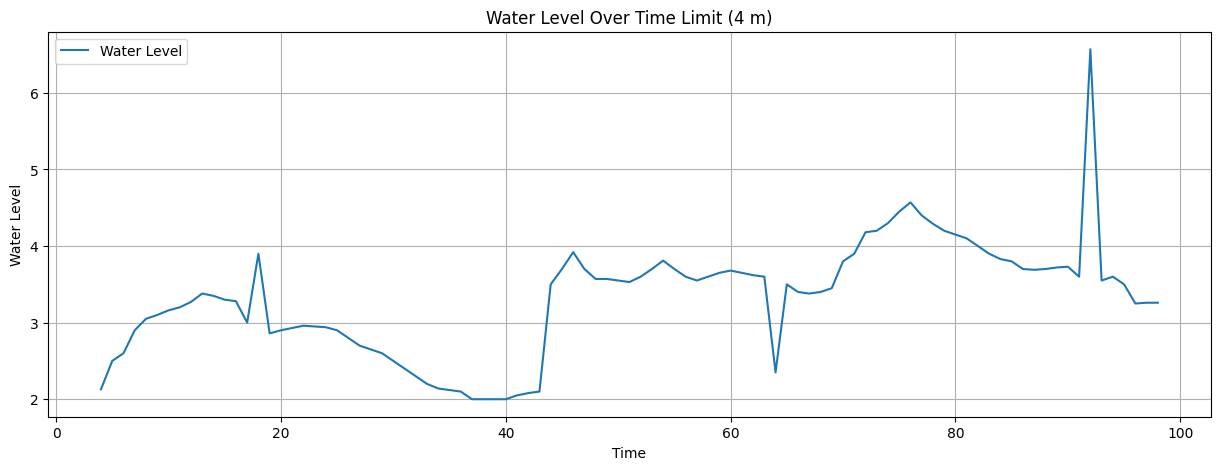

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))
plt.plot(df.index, df['Water_Level'], label='Water Level')
plt.title('Water Level Over Time Limit (4 m)')
plt.xlabel('Time')
plt.ylabel('Water Level')
plt.grid(True)
plt.legend()
plt.show()


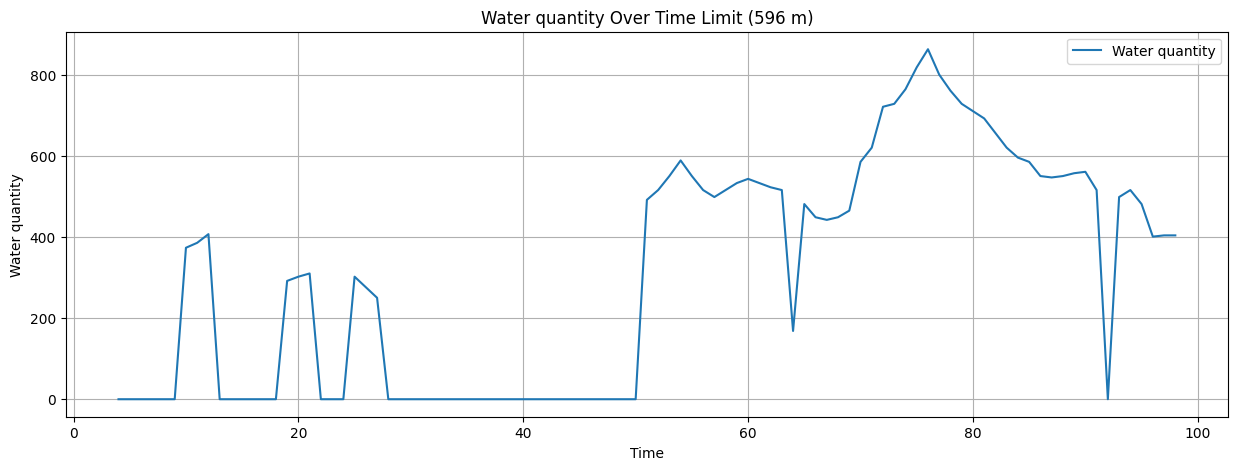

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df.index, df['Water quantity'], label='Water quantity')
plt.title('Water quantity Over Time Limit (596 m)')
plt.xlabel('Time')
plt.ylabel('Water quantity')
plt.grid(True)
plt.legend()
plt.show()

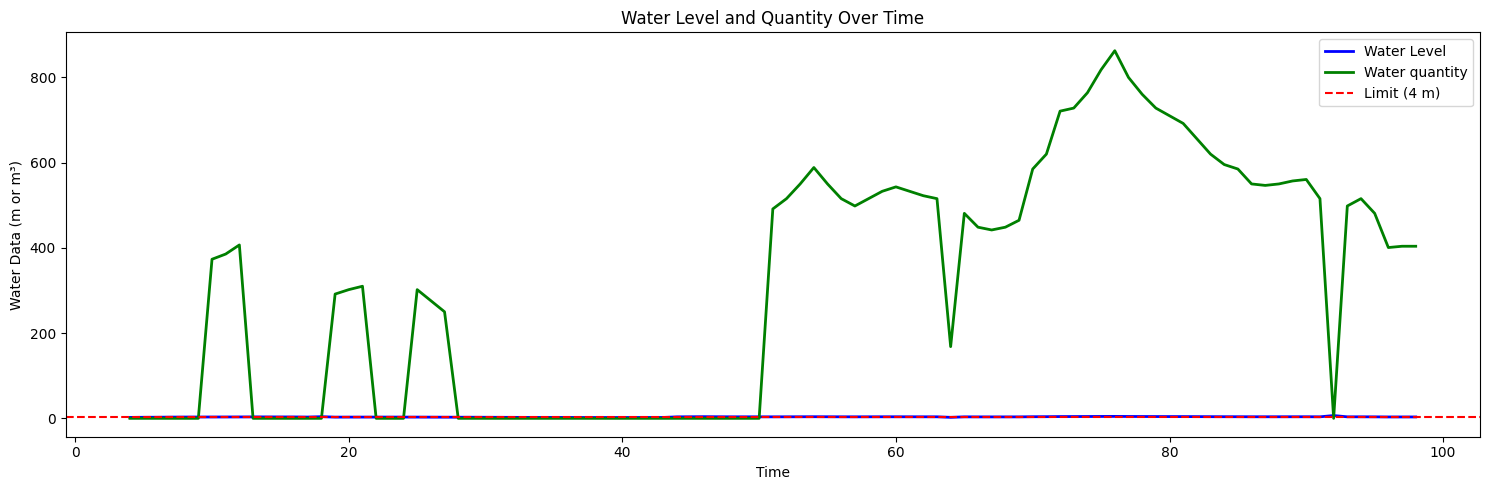

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(data.index, df['Water_Level'], label='Water Level', color='blue', linewidth=2)
plt.plot(data.index, df['Water quantity'], label='Water quantity', color='green', linewidth=2)

# เพิ่มเส้นแนวนอนแสดงขีดจำกัดระดับน้ำ (4 เมตร)
plt.axhline(y=4, color='red', linestyle='--', linewidth=1.5, label='Limit (4 m)')

plt.title('Water Level and Quantity Over Time')
plt.xlabel('Time')
plt.ylabel('Water Data (m or m³)')
plt.legend()
plt.tight_layout()
plt.show()


## Chage name Columns

In [14]:
# เลือกเฉพาะคอลัมน์ที่ต้องใช้ แล้วเปลี่ยนชื่อ
data = df[['date','Water_Level']].copy()
data.columns = ['date','target']

# แสดงผล
data


,date,target
4,01/08/2024/06.00,2.13
5,01/08/2024/12.00,2.50
6,01/08/2024/18.00,2.60
7,02/08/2024/06.00,2.90
8,02/08/2024/12.00,3.05
...,...,...
94,30/08/2024/12.00,3.60
95,30/08/2024/18.00,3.50
96,31/08/2024/06.00,3.25
97,31/08/2024/12.00,3.26


## Divide data for train 

In [16]:
n_train = int(len(df) * 0.6)  # ✅ 60% ของจำนวนแถว
n_train

57

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Normalize data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['target']]) # ทำการ Normalize data ที่ใช้ คือ rain เเละ water_level

In [18]:
train , test = scaled[0:n_train] , scaled[n_train:]
train.shape , test.shape

## (จำนวนชุดข้อมูล , feture)

((57, 1), (38, 1))

## build seqence for LSTM
## deta need to numpy

In [20]:
# build sequence
import numpy as np

timesteps = 3  # สมมุติว่าให้โมเดลดูย้อนหลัง 3 วัน
x_train, y_train = [], []

for i in range(timesteps, len(train)):
    x_seq = train[i - timesteps:i]  # 3 วันก่อนหน้า (shape = (3, 1))
    y_val = train[i]                # ค่าที่จะทำนาย (วันที่ 4)

    x_train.append(x_seq)
    y_train.append(y_val)

# แปลงเป็น array
x_train = np.array(x_train)
y_train = np.array(y_train)

#x_train.shape , y_train.shape
x_train , y_train

(array([[[0.02844639],
         [0.10940919],
         [0.13129103]],
 
        [[0.10940919],
         [0.13129103],
         [0.19693654]],
 
        [[0.13129103],
         [0.19693654],
         [0.2297593 ]],
 
        [[0.19693654],
         [0.2297593 ],
         [0.24070022]],
 
        [[0.2297593 ],
         [0.24070022],
         [0.25382932]],
 
        [[0.24070022],
         [0.25382932],
         [0.26258206]],
 
        [[0.25382932],
         [0.26258206],
         [0.27789934]],
 
        [[0.26258206],
         [0.27789934],
         [0.30196937]],
 
        [[0.27789934],
         [0.30196937],
         [0.29540481]],
 
        [[0.30196937],
         [0.29540481],
         [0.28446389]],
 
        [[0.29540481],
         [0.28446389],
         [0.28008753]],
 
        [[0.28446389],
         [0.28008753],
         [0.21881838]],
 
        [[0.28008753],
         [0.21881838],
         [0.41575492]],
 
        [[0.21881838],
         [0.41575492],
         [0.188183

In [21]:
x_test, y_test = [], []

for i in range(timesteps, len(test)):
    x_seq = test[i - timesteps:i]
    y_val = test[i]

    x_test.append(x_seq)
    y_test.append(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test.shape , y_test.shape
x_test

array([[[0.36105033],
        [0.35448578],
        [0.35010941]],

       [[0.35448578],
        [0.35010941],
        [0.07658643]],

       [[0.35010941],
        [0.07658643],
        [0.32822757]],

       [[0.07658643],
        [0.32822757],
        [0.30634573]],

       [[0.32822757],
        [0.30634573],
        [0.30196937]],

       [[0.30634573],
        [0.30196937],
        [0.30634573]],

       [[0.30196937],
        [0.30634573],
        [0.31728665]],

       [[0.30634573],
        [0.31728665],
        [0.39387309]],

       [[0.31728665],
        [0.39387309],
        [0.41575492]],

       [[0.39387309],
        [0.41575492],
        [0.47702407]],

       [[0.41575492],
        [0.47702407],
        [0.48140044]],

       [[0.47702407],
        [0.48140044],
        [0.50328228]],

       [[0.48140044],
        [0.50328228],
        [0.53610503]],

       [[0.50328228],
        [0.53610503],
        [0.56236324]],

       [[0.53610503],
        [0.56236324],
    

In [79]:
y_test

array([0.07658643, 0.32822757, 0.30634573, 0.30196937, 0.30634573,
       0.31728665, 0.39387309, 0.41575492, 0.47702407, 0.48140044,
       0.50328228, 0.53610503, 0.56236324, 0.52516411, 0.50109409,
       0.48140044, 0.47045952, 0.4595186 , 0.43763676, 0.41575492,
       0.40043764, 0.39387309, 0.37199125, 0.36980306, 0.37199125,
       0.37636761, 0.3785558 , 0.35010941, 1.        , 0.33916849,
       0.35010941, 0.32822757, 0.27352298, 0.27571116, 0.27571116])

## June 3D for LSTM model

In [23]:
# เปลี่ยนเป็นรูปแบบ 3D สำหรับ LSTM
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  # (N, timesteps, features)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((54, 3, 1), (54, 1), (35, 3, 1), (35, 1))

## Model LSTM

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# สร้างโมเดล Sequential
model = Sequential()

# เพิ่ม Layer LSTM
model.add(LSTM(units=32, return_sequences=False, input_shape=(x_train.shape[1], 1)))

# เพิ่ม Dropout เพื่อลดการ overfitting
model.add(Dropout(0.2))

# เพิ่ม Layer Dense (fully connected)
model.add(Dense(units=1))  # ทำนายค่าระดับน้ำในวันถัดไป

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='mean_squared_error' , metrics = ['mae' , 'mse'])

# สรุปโมเดล
model.summary()

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

## Divide for train and test

## Practics Model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

# ใช้ EarlyStopping เพื่อหยุดฝึกเมื่อ val_loss ไม่ดีขึ้นหลังจาก 5 รอบ
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# แบ่งข้อมูล test สำหรับ validation
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test), callbacks=[early_stop], batch_size=32)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.0649 - mae: 0.2177 - mse: 0.0649 - val_loss: 0.1658 - val_mae: 0.3829 - val_mse: 0.1658
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0548 - mae: 0.1974 - mse: 0.0548 - val_loss: 0.1525 - val_mae: 0.3654 - val_mse: 0.1525
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0507 - mae: 0.1904 - mse: 0.0507 - val_loss: 0.1398 - val_mae: 0.3477 - val_mse: 0.1398
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0467 - mae: 0.1840 - mse: 0.0467 - val_loss: 0.1276 - val_mae: 0.3299 - val_mse: 0.1276
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mae: 0.1682 - mse: 0.0387 - val_loss: 0.1160 - val_mae: 0.3126 - val_mse: 0.1160
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0355 - mae: 0.1600 - mse: 0.0355 - val_loss: 0.1049 - val_mae: 0.2955 - val_mse: 0.1049
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0335 - mae: 0.1574 - mse: 0.0335 - val_loss:

## Check loss

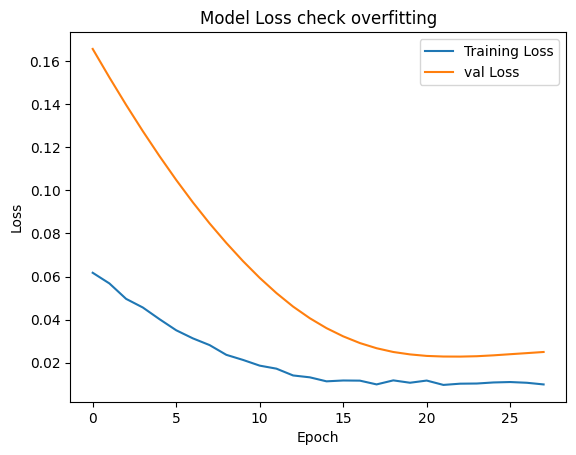

In [30]:
# สร้างกราฟ loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.title('Model Loss check overfitting')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

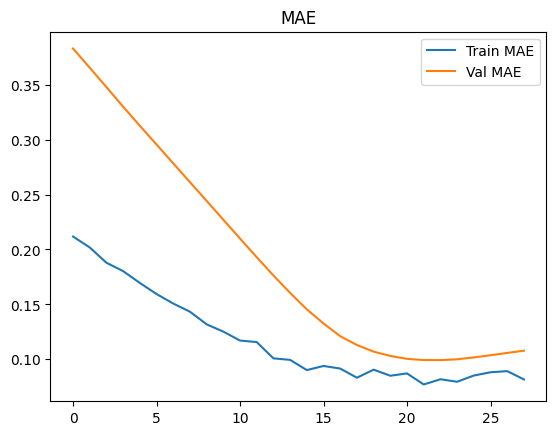

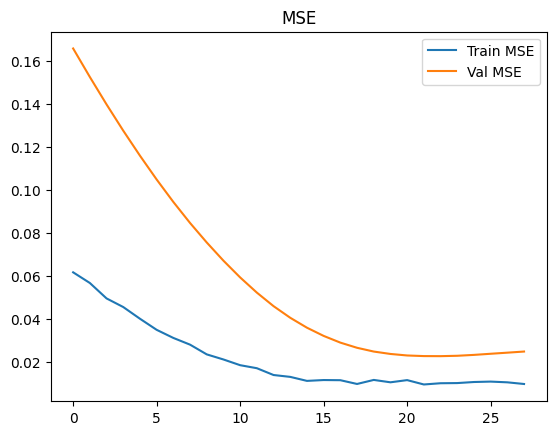

In [31]:
# แสดง MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.title('MAE')
plt.show()

# แสดง MSE
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.legend()
plt.title('MSE')
plt.show()


In [49]:
y_pred.shape , y_test.shape

((1, 1), (35, 1))

##

##

In [53]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test[0].reshape(1, timesteps, 1))
print(x_test[0].reshape(1, timesteps, 1))
#print(y_pred[0][0])

# ย้อนกลับค่า prediction (จาก normalized กลับเป็น original)
y_pred_original = scaler.inverse_transform(y_pred)
#print(y_pred_original[0][0])
print("ตาดการณ์ระดับน้ำอยู่ที่  ",f"{y_pred_original[0][0]:.2f}","เมตร")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[[0.36105033]
  [0.35448578]
  [0.35010941]]]
ตาดการณ์ระดับน้ำอยู่ที่   3.41 เมตร


In [55]:
print("Input (ย้อนหลัง):", scaler.inverse_transform(x_test[0].reshape(-1, 1)).flatten())
print("ค่าที่แท้จริง (y_test):", scaler.inverse_transform(y_test[0].reshape(-1, 1))[0][0])
print("ค่าที่โมเดลทำนาย:", scaler.inverse_transform(y_pred.reshape(-1, 1))[0][0])

Input (ย้อนหลัง): [3.65 3.62 3.6 ]
ค่าที่แท้จริง (y_test): 2.35
ค่าที่โมเดลทำนาย: 3.4140856


In [57]:
y_pred_01 = model.predict(x_test[1].reshape(1, timesteps, 1))
print(x_test[1].reshape(1, timesteps, 1))
#print(y_pred[0][0])

# ย้อนกลับค่า prediction (จาก normalized กลับเป็น original)
y_pred_original = scaler.inverse_transform(y_pred_01)
#print(y_pred_original[0][0])
print("ตาดการณ์ระดับน้ำอยู่ที่  ",f"{y_pred_original[0][0]:.2f}","เมตร")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[[0.35448578]
  [0.35010941]
  [0.07658643]]]
ตาดการณ์ระดับน้ำอยู่ที่   3.27 เมตร


In [61]:
print("Input (ย้อนหลัง):", scaler.inverse_transform(x_test[1].reshape(-1, 1)).flatten())
print("ค่าที่แท้จริง (y_test):", scaler.inverse_transform(y_test[1].reshape(-1, 1))[0][0] , "เมตร")
print("ค่าที่โมเดลทำนาย:", scaler.inverse_transform(y_pred_01.reshape(-1, 1))[0][0])

Input (ย้อนหลัง): [3.62 3.6  2.35]
ค่าที่แท้จริง (y_test): 3.5 เมตร
ค่าที่โมเดลทำนาย: 3.2723176


## การพัฒนา model ต่อไป ลองเพิ่ม LSTM Layer  , ลองเพิ่ม feature

##

In [65]:
loss, mae, mse = model.evaluate(x_test, y_test)
print(f"loss: {loss:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.0235 - mae: 0.1018 - mse: 0.0235 
loss: 0.0228
MAE: 0.0993
MSE: 0.0228


In [67]:
x_test

array([[[0.36105033],
        [0.35448578],
        [0.35010941]],

       [[0.35448578],
        [0.35010941],
        [0.07658643]],

       [[0.35010941],
        [0.07658643],
        [0.32822757]],

       [[0.07658643],
        [0.32822757],
        [0.30634573]],

       [[0.32822757],
        [0.30634573],
        [0.30196937]],

       [[0.30634573],
        [0.30196937],
        [0.30634573]],

       [[0.30196937],
        [0.30634573],
        [0.31728665]],

       [[0.30634573],
        [0.31728665],
        [0.39387309]],

       [[0.31728665],
        [0.39387309],
        [0.41575492]],

       [[0.39387309],
        [0.41575492],
        [0.47702407]],

       [[0.41575492],
        [0.47702407],
        [0.48140044]],

       [[0.47702407],
        [0.48140044],
        [0.50328228]],

       [[0.48140044],
        [0.50328228],
        [0.53610503]],

       [[0.50328228],
        [0.53610503],
        [0.56236324]],

       [[0.53610503],
        [0.56236324],
    

In [69]:
y_pred = model.predict(x_test)
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step   
[[0.309428  ]
 [0.27840644]
 [0.26552564]
 [0.25391933]
 [0.29189128]
 [0.28810254]
 [0.28917158]
 [0.2996697 ]
 [0.31485477]
 [0.33749646]
 [0.35054007]
 [0.36392012]
 [0.3714382 ]
 [0.3828152 ]
 [0.38813788]
 [0.3845215 ]
 [0.37254176]
 [0.36440188]
 [0.35828555]
 [0.35245988]
 [0.3450561 ]
 [0.33653936]
 [0.32993707]
 [0.32404983]
 [0.3195589 ]
 [0.31581917]
 [0.3162407 ]
 [0.3174733 ]
 [0.31544843]
 [0.38193366]
 [0.39915708]
 [0.41444924]
 [0.30279568]
 [0.2956082 ]
 [0.28439507]]


In [71]:
y_test

array([[0.07658643],
       [0.32822757],
       [0.30634573],
       [0.30196937],
       [0.30634573],
       [0.31728665],
       [0.39387309],
       [0.41575492],
       [0.47702407],
       [0.48140044],
       [0.50328228],
       [0.53610503],
       [0.56236324],
       [0.52516411],
       [0.50109409],
       [0.48140044],
       [0.47045952],
       [0.4595186 ],
       [0.43763676],
       [0.41575492],
       [0.40043764],
       [0.39387309],
       [0.37199125],
       [0.36980306],
       [0.37199125],
       [0.37636761],
       [0.3785558 ],
       [0.35010941],
       [1.        ],
       [0.33916849],
       [0.35010941],
       [0.32822757],
       [0.27352298],
       [0.27571116],
       [0.27571116]])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


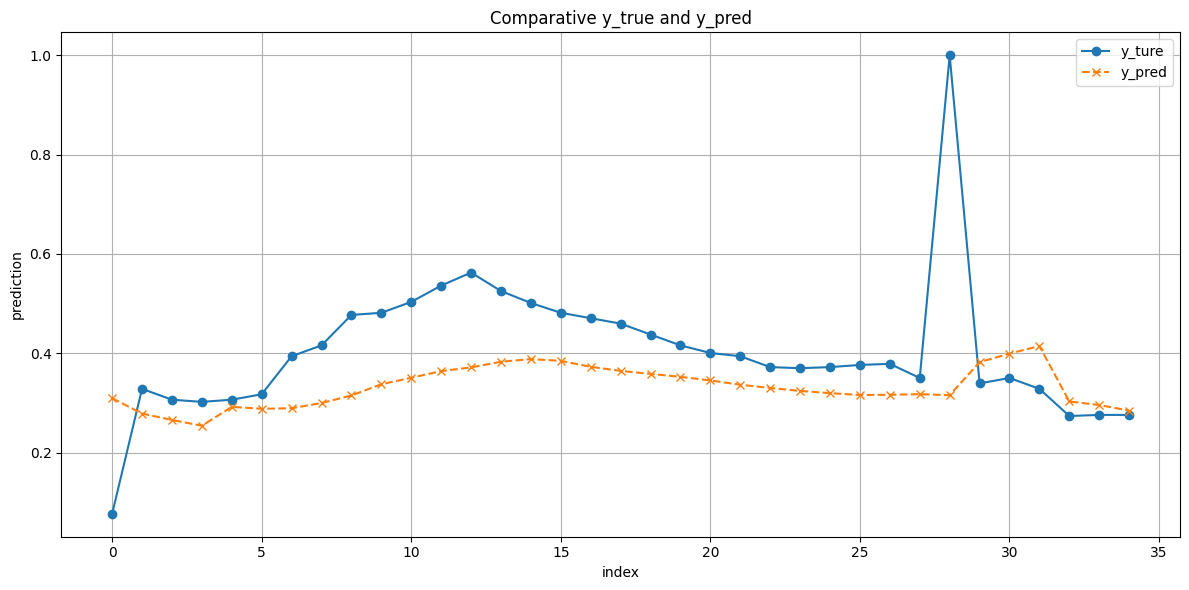

In [73]:
import matplotlib.pyplot as plt

# ทำนาย
y_pred = model.predict(x_test)

# แปลงให้อยู่ในรูป 1D ถ้าจำเป็น
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Plot กราฟ
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='y_ture', marker='o')
plt.plot(y_pred, label='y_pred', linestyle='--', marker='x')
plt.title('Comparative y_true and y_pred')
plt.xlabel('index')
plt.ylabel('prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
x_train.shape[1]

3

In [83]:
for i in range(timesteps, 5):
    print(i)

3
4
